# 1- Problem statement

In this project we are trying to predict the home prices based on multiple parameters:
Independent variables:
1.	Area
2.	Bedrooms-Num
3.	Age

Dependant variable(feature)

 1.home_price


In [1]:
# firstly will call the basic libraries to load and discover the data set
#Import all important libraries 
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

__author__ = "Ahmad Shhadeh"
__email__ = "ashhadeh@yahoo.com"
__Date__ = "2019-10-05"

# 2 - Load & descover the dataSet


In [26]:
#read the test data using panda's function 
df=pd.read_csv("homeprices.csv")
df.head()

,area,bedrooms,age,price
0,500,3.0,20,50000
1,1000,4.0,15,60000
2,3200,NaN,18,100000
3,3600,3.0,30,85000
4,4000,5.0,8,120000


# 3 - Data reprocessing and cleaning

#chcking the duplicate data, invalid data, nulls  or corrupt data ...etc 

In [27]:
#Use .info() to see length and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
area        7 non-null int64
bedrooms    6 non-null float64
age         7 non-null int64
price       7 non-null int64
dtypes: float64(1), int64(3)
memory usage: 304.0 bytes


Check for duplicates

In [28]:
df.duplicated().sum()

0

From the above data, we noticed that the 3rd rows has "NaN" on bedroom column 
for that we have to take action before we proceed as all ML linear models work only with numbers

There are different ways to handle the empty/Null record, and all depend on our understanding of the data and the requirement 
#For example below some of actions can take:
1- Drop the complete row
2- Replaced with 0
3- Replaced with mean/median or mood
4- ...etc
 
#In our case to make it simple we are going to calculate the median use instead of NULL



In [29]:
# to find the median for bedrooms
import math
median_bedrooms=df.bedrooms.median()

#to replace teh new value with NULL will use fillna function 
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
median_bedrooms



3.5

Math Statistics: Mode, Median and Mean

1-The mean is the usual average

2-The median is the middle value

3-The mode is the number that is repeated more often than any other


In [30]:
# the data set after reprocessing
df

,area,bedrooms,age,price
0,500,3.0,20,50000
1,1000,4.0,15,60000
2,3200,3.5,18,100000
3,3600,3.0,30,85000
4,4000,5.0,8,120000
5,4100,6.0,8,150000
6,200,3.0,8,40000


# Checking the correlation between the variables



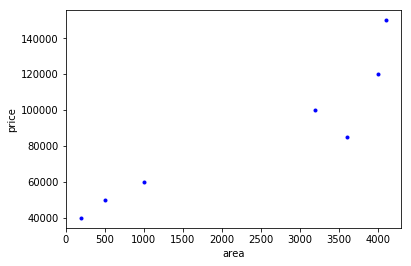

In [31]:
#Area vs Price 
# plotting the data in the chart to explore the data distribution and choose the best model

%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='Blue',marker='.')




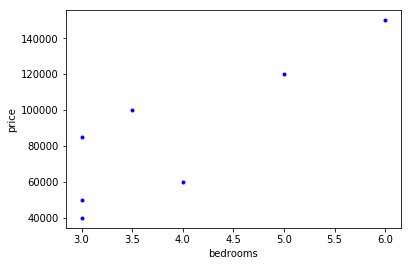

In [32]:
#bedrooms vs Price 
# plotting the data in the chart to explore the data distribution and choose the best model

%matplotlib inline
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.scatter(df.bedrooms,df.price,color='Blue',marker='.')

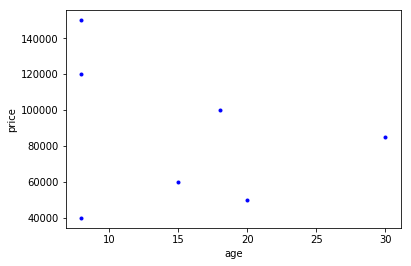

In [33]:
#Home Age vs Price 
# plotting the data in the chart to explore the data distribution and choose the best model

%matplotlib inline
plt.xlabel('age')
plt.ylabel('price')
plt.scatter(df.age,df.price,color='Blue',marker='.')

In [10]:
#will devide the dat set to train set and test set 
# preparing X&y
X=df.drop('price',axis='columns')
y=df.price
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
# X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)
# to get same result for each run we can sue random_state parameter

In [29]:
# 80% for training 
len(X_train)

4

In [30]:
len(y_train)

4

In [11]:
X_train

,area,bedrooms,age
0,500,3.0,20
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8
1,1000,4.0,15


In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 2 to 6
Data columns (total 3 columns):
area        2 non-null int64
bedrooms    2 non-null float64
age         2 non-null int64
dtypes: float64(1), int64(2)
memory usage: 64.0 bytes


In [20]:
y_train

0    550000
2    610000
1    565000
4    760000
Name: price, dtype: int64

In [21]:
y_test

3    595000
5    810000
Name: price, dtype: int64

# 4- Model Creation 


In [12]:
# looking for the relation between the independent variable and dependant it seems simple and linear
# we are going to choose linear regression model

#Create linear regression object
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# extar checking for the result 
# it is a linear regression relation and the standard equation for that is
# Y = m * X + b (m is coefficient and b is intercept)


In [13]:
reg.coef_

array([1.15946239e+01, 2.37725618e+04, 7.81044233e+02])

In [14]:
reg.intercept_


-50107.48315128987

In [15]:
# runing the model
reg.predict (X_test)


array([84258.0757611 , 29777.48082733])

In [43]:
y_test

2    610000
5    810000
Name: price, dtype: int64

In [17]:
# to check the model accuracy
# will compre between above results 
#y_test vs y_predicted
#y_predicted: 608500, 319000
#y_test:   810000  ,760000


reg.score(X_test,y_test)

0.8042732905672357